In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('_All_Cities_Cleaned.csv')
dataset.head(5)

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad


# One Hot Encoding

In [3]:
seller= pd.get_dummies(dataset['seller_type'],drop_first=True)
seller.head(5)

,BUILDER,OWNER
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [4]:
layout= pd.get_dummies(dataset['layout_type'],drop_first=True)
layout.head(5)

,RK
0,0
1,1
2,0
3,0
4,0


In [5]:
propertytype= pd.get_dummies(dataset['property_type'],drop_first=True)
propertytype.head(5)

,Independent Floor,Independent House,Penthouse,Studio Apartment,Villa
0,0,0,0,0,0
1,0,0,0,1,0
2,0,0,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [6]:
furnish= pd.get_dummies(dataset['furnish_type'],drop_first=True)
furnish.head(5)

,Semi-Furnished,Unfurnished
0,0,0
1,1,0
2,0,1
3,1,0
4,0,0


In [7]:
location = pd.get_dummies(dataset['city'],drop_first=True)
location.head(5)

,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Pune
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [8]:
merged = pd.concat([dataset,seller, layout, propertytype, furnish, location],axis='columns')
merged

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,...,Villa,Semi-Furnished,Unfurnished,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Pune
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad,...,0,0,0,0,0,0,0,0,0,0
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad,...,0,1,0,0,0,0,0,0,0,0
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad,...,0,0,1,0,0,0,0,0,0,0
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad,...,0,1,0,0,0,0,0,0,0,0
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193006,OWNER,1.0,BHK,Apartment,Chinchwad,13250.0,650.0,Semi-Furnished,1.0,Pune,...,0,1,0,0,0,0,0,0,0,1
193007,OWNER,1.0,RK,Studio Apartment,Wadgaon Sheri,7000.0,350.0,Unfurnished,1.0,Pune,...,0,0,1,0,0,0,0,0,0,1
193008,OWNER,1.0,BHK,Apartment,Kothrud,8500.0,389.0,Semi-Furnished,1.0,Pune,...,0,1,0,0,0,0,0,0,0,1
193009,AGENT,1.0,BHK,Apartment,Wakad,16500.0,670.0,Semi-Furnished,2.0,Pune,...,0,1,0,0,0,0,0,0,0,1


## Remove Identifiers

In [9]:
clean_dataset = merged.drop(["seller_type","layout_type","property_type","locality","furnish_type","city"],axis='columns')

In [10]:
clean_dataset.head(5)

,bedroom,price,area,bathroom,BUILDER,OWNER,RK,Independent Floor,Independent House,Penthouse,...,Villa,Semi-Furnished,Unfurnished,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Pune
0,2.0,20000.0,1450.0,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,7350.0,210.0,1.0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3.0,22000.0,1900.0,3.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2.0,13000.0,1285.0,2.0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,2.0,18000.0,1600.0,2.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
clean_dataset.shape

(193011, 21)

In [12]:
clean_dataset.describe()

,bedroom,price,area,bathroom,BUILDER,OWNER,RK,Independent Floor,Independent House,Penthouse,...,Villa,Semi-Furnished,Unfurnished,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Pune
count,193011.000000,1.930110e+05,193011.000000,193011.000000,193011.000000,193011.000000,193011.000000,193011.000000,193011.000000,193011.000000,...,193011.000000,193011.000000,193011.000000,193011.000000,193011.000000,193011.000000,193011.000000,193011.000000,193011.000000,193011.000000
mean,2.081679,4.433654e+04,1264.604468,2.059883,0.006974,0.200579,0.047992,0.141355,0.066514,0.000808,...,0.016139,0.495961,0.304107,0.119537,0.044858,0.168944,0.054629,0.050070,0.349286,0.117071
std,0.956901,9.195199e+04,1043.725561,0.934805,0.083217,0.400435,0.213750,0.348388,0.249180,0.028418,...,0.126010,0.499985,0.460029,0.324420,0.206992,0.374703,0.227255,0.218089,0.476746,0.321506
min,1.000000,1.200000e+03,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.300000e+04,650.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.100000e+04,1000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,3.600000e+04,1440.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,15.000000,5.885000e+06,19800.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#Check Null Value
clean_dataset.isnull().sum()

bedroom              0
price                0
area                 0
bathroom             0
BUILDER              0
OWNER                0
RK                   0
Independent Floor    0
Independent House    0
Penthouse            0
Studio Apartment     0
Villa                0
Semi-Furnished       0
Unfurnished          0
Bangalore            0
Chennai              0
Delhi                0
Hyderabad            0
Kolkata              0
Mumbai               0
Pune                 0
dtype: int64

## Separate x,y

In [14]:
x = clean_dataset.drop(['price'],axis=1)

In [15]:
x.head(5)

,bedroom,area,bathroom,BUILDER,OWNER,RK,Independent Floor,Independent House,Penthouse,Studio Apartment,Villa,Semi-Furnished,Unfurnished,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Pune
0,2.0,1450.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,210.0,1.0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,3.0,1900.0,3.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2.0,1285.0,2.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,2.0,1600.0,2.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
y = clean_dataset['price']

In [17]:
y.head(5)

0    20000.0
1     7350.0
2    22000.0
3    13000.0
4    18000.0
Name: price, dtype: float64

In [18]:
# importing train_test_split from sklearn

from sklearn.model_selection import train_test_split

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=51)

print('Shape of X_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (154408, 20)
Shape of y_train =  (154408,)
Shape of X_test =  (38603, 20)
Shape of y_test =  (38603,)


## Polynomial Features

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
x_train_poly = poly_reg.fit_transform(x_train)
x_test_poly = poly_reg.fit_transform(x_test)

In [20]:
x_train_poly.shape, x_test_poly.shape

((154408, 231), (38603, 231))

## Linear Regression

In [21]:
# importing module
from sklearn.linear_model import LinearRegression

#### Use for Polynomial

In [22]:
lr = LinearRegression()
# fitting the training data
lr.fit(x_train_poly, y_train)

LinearRegression()

#### Use for multiple linear regression

In [23]:
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

# Prefomance

### Linear Regression 

In [24]:
y_prediction =  LR.predict(x_test)

In [25]:
y_prediction

array([170264.42538179,  41174.52379789,  34322.33780219, ...,
       158080.91306003, 107026.99764762,  28900.89648345])

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test,y_prediction )

0.615196611153411

In [27]:
from sklearn.metrics import mean_squared_error
mse_l=mean_squared_error(y_test,y_prediction)

In [28]:
mse_l

3251896131.8487263

In [29]:
from math import sqrt
rmse_l = sqrt(mse_l)

In [30]:
rmse_l

57025.39900648417

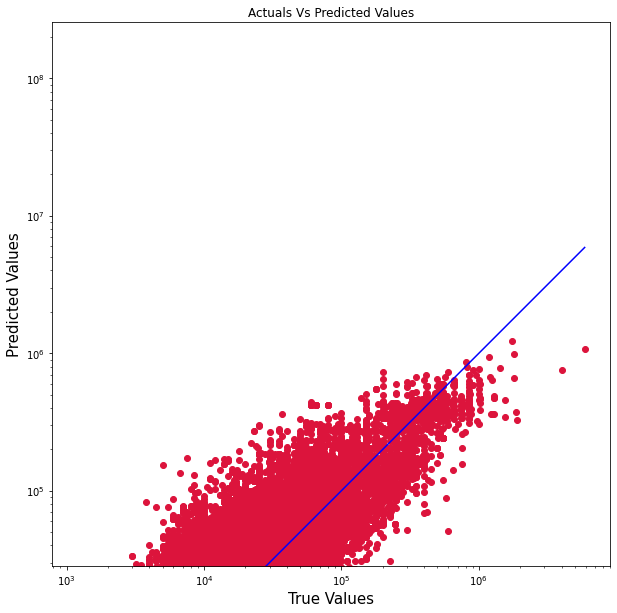

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_prediction, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_prediction), max(y_test))
p2 = min(min(y_prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('Actuals Vs Predicted Values')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

### Polynomial Regression

In [32]:
y_predict = lr.predict(x_test_poly)

In [33]:
y_predict

array([186612.11335329,  23308.66522209,  54515.27326908, ...,
        51934.57721699, 126110.97060633,  12822.85758263])

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict )

0.7507607905956183

In [35]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_predict)

In [36]:
mse

2106270486.3294966

In [37]:
from math import sqrt

rmse = sqrt(mse)

In [38]:
rmse

45894.12256846727

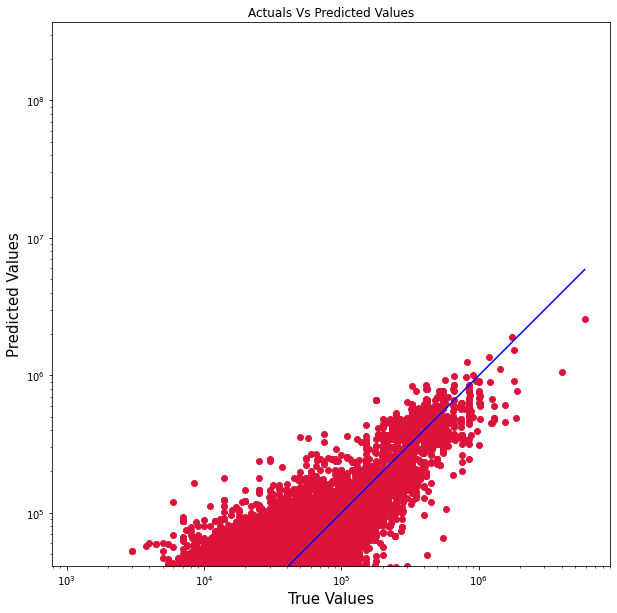

In [39]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_predict, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_predict), max(y_test))
p2 = min(min(y_predict), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('Actuals Vs Predicted Values')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()